<a href="https://colab.research.google.com/github/AbdillahHalim/FinalTask_Kalbe_DS/blob/main/VIX_kable_machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules

In [1]:
!pip install feature-engine
!pip install pmdarima
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from pmdarima.arima import auto_arima
from scipy import stats
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

#Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset ini terdiri dari 4 csv file yaitu customer, store, product dan transaction. Merupakan dummy data untuk studi kasus FMCG dalam kurun waktu 1 tahun yang diambil melalui program membership.

Penjelasan :
1. Customer = df_cust
- CustomerID : No Unik Customer
- Age : Usia Customer
- Gender : 0 Wanita, 1 Pria
- Marital Status : Married, Single (Blm menikah/Pernah menikah)
- Income : Pendapatan per bulan dalam jutaan rupiah

2. Store = df_str
- StoreID : Kode Unik Store
- StoreName : Nama Toko
- GroupStore : Nama group
- Type : Modern Trade, General Trade
- Latitude : Kode Latitude
- Longitude : Kode Longitude

3. Product = df_prod
- ProductID : Kode Unik Product
- Product Name : Nama Product
- Price : Harga dlm rupiah

4. Transaction = df_trns
- TransactionID : Kode Unik Transaksi
- Date : Tanggal transaksi
- Qty : Jumlah item yang dibeli
- Total Amount : Price x Qty

In [3]:
df_cust = pd.read_csv("/content/drive/MyDrive/colab_dataset/kable_ds/Case Study - Customer.csv")
df_str  = pd.read_csv("/content/drive/MyDrive/colab_dataset/kable_ds/Case Study - Store.csv")
df_prod = pd.read_csv("/content/drive/MyDrive/colab_dataset/kable_ds/Case Study - Product.csv")
df_trns = pd.read_csv("/content/drive/MyDrive/colab_dataset/kable_ds/Case Study - Transaction.csv")

#EDA

##EDA for Customer

In [4]:
df_cust.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5
1,2,60,1,Married,6
2,3,32,1,Married,9
3,4,31,1,Married,4
4,5,58,1,Married,3


In [5]:
df_cust.info

<bound method DataFrame.info of      CustomerID  Age  Gender Marital Status  Income
0             1   55       1        Married       5
1             2   60       1        Married       6
2             3   32       1        Married       9
3             4   31       1        Married       4
4             5   58       1        Married       3
..          ...  ...     ...            ...     ...
442         443   33       1            NaN       9
443         444   53       0        Married      15
444         445   51       0        Married      14
445         446   57       0        Married       7
446         447   54       1        Married      20

[447 rows x 5 columns]>

In [6]:
df_cust.shape

(447, 5)

###Checking NA values

In [7]:
data_=pd.DataFrame(df_cust.isnull().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/df_cust.shape[0]*100
data_

,Number Of Null,Percentage
CustomerID,0,0.000000
Age,0,0.000000
Gender,0,0.000000
Marital Status,3,0.671141
Income,0,0.000000


In [8]:
df_custNull = df_cust.copy()

In [9]:
df_custNull['Marital_null'] = np.where(df_cust['Marital Status'].isnull(), 1, 0)
df_custNull

,CustomerID,Age,Gender,Marital Status,Income,Marital_null
0,1,55,1,Married,5,0
1,2,60,1,Married,6,0
2,3,32,1,Married,9,0
3,4,31,1,Married,4,0
4,5,58,1,Married,3,0
...,...,...,...,...,...,...
442,443,33,1,NaN,9,1
443,444,53,0,Married,15,0
444,445,51,0,Married,14,0
445,446,57,0,Married,7,0


In [10]:
print('Value Counts')
print(df_custNull.groupby(['Age'])['Marital_null'].value_counts())

print('\nMean')
print(df_custNull.groupby(['Age'])['Marital_null'].mean())

Value Counts
Age  Marital_null
0    0                1
2    0                1
3    0                1
18   0                7
19   0               10
20   0                5
21   0                6
22   0                9
23   0                7
24   0                8
25   0               10
26   0               13
27   0                7
     1                1
28   0                8
29   0               11
30   0                9
31   0               16
32   0               10
33   0               13
     1                1
34   0               16
     1                1
35   0               13
36   0               12
37   0               14
38   0               12
39   0                9
40   0               12
41   0               11
42   0                5
43   0                7
44   0               12
45   0               18
46   0                9
47   0                9
48   0               10
49   0                8
50   0                3
51   0               13
52   0   

In [11]:
print('Value Counts')
print(df_custNull.groupby(['Income'])['Marital_null'].value_counts())

print('\nMean')
print(df_custNull.groupby(['Income'])['Marital_null'].mean())

Value Counts
Income  Marital_null
0       0               22
1       0                7
2       0               24
3       0               48
        1                1
4       0               43
        1                1
5       0               32
6       0               33
7       0               27
8       0               26
9       0               38
        1                1
10      0               40
11      0                7
12      0               13
13      0               14
14      0               10
15      0                9
16      0               10
17      0               11
18      0               10
19      0                6
20      0                6
21      0                1
23      0                1
25      0                1
28      0                1
33      0                1
35      0                1
54      0                1
71      0                1
Name: Marital_null, dtype: int64

Mean
Income
0     0.000000
1     0.000000
2     0.000000
3     0.020

In [12]:
print('Value Counts')
print(df_custNull.groupby(['Gender'])['Marital_null'].value_counts())

print('\nMean')
print(df_custNull.groupby(['Gender'])['Marital_null'].mean())

Value Counts
Gender  Marital_null
0       0               242
1       0               202
        1                 3
Name: Marital_null, dtype: int64

Mean
Gender
0    0.000000
1    0.014634
Name: Marital_null, dtype: float64


##EDA for Store

In [13]:
df_str.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797,068","110,370,529"
3,4,Gita Ginara,Gita,General Trade,"-6,966,667","110,416,664"
4,5,Bonafid,Gita,General Trade,"-7,250,445","112,768,845"


In [14]:
df_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [15]:
df_str.shape

(14, 6)

###Checking NA values

In [16]:
data_=pd.DataFrame(df_str.isnull().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/df_str.shape[0]*100
data_

,Number Of Null,Percentage
StoreID,0,0.0
StoreName,0,0.0
GroupStore,0,0.0
Type,0,0.0
Latitude,0,0.0
Longitude,0,0.0


##EDA for Product

In [17]:
df_prod.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [18]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [19]:
df_prod.shape

(10, 3)

###Checking NA Values

In [20]:
data_=pd.DataFrame(df_prod.isnull().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/df_prod.shape[0]*100
data_

,Number Of Null,Percentage
ProductID,0,0.0
Product Name,0,0.0
Price,0,0.0


##EDA for Transaction

In [21]:
df_trns.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,1/1/2022,P3,7500,4,30000,12
1,TR16356,165,1/1/2022,P9,10000,7,70000,1
2,TR1984,183,1/1/2022,P1,8800,4,35200,4
3,TR35256,160,1/1/2022,P1,8800,7,61600,4
4,TR41231,386,1/1/2022,P9,10000,1,10000,4


In [22]:
df_trns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [23]:
df_trns.shape

(5020, 8)

###Checking NA Values

In [24]:
data_=pd.DataFrame(df_str.isnull().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/df_str.shape[0]*100
data_

,Number Of Null,Percentage
StoreID,0,0.0
StoreName,0,0.0
GroupStore,0,0.0
Type,0,0.0
Latitude,0,0.0
Longitude,0,0.0


#Data Cleaning

Proses Data Cleanning akan dilakukan
1. Handling Missing Value
2. Outlier Handling

##Handling Missing Value

In [25]:
df_cust.dropna()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5
1,2,60,1,Married,6
2,3,32,1,Married,9
3,4,31,1,Married,4
4,5,58,1,Married,3
...,...,...,...,...,...
441,442,42,1,Married,14
443,444,53,0,Married,15
444,445,51,0,Married,14
445,446,57,0,Married,7


In [26]:
df_cust.isnull().sum().sort_values(ascending=False)

Marital Status    3
CustomerID        0
Age               0
Gender            0
Income            0
dtype: int64

##Outlier Handling

Outlier handling, also known as outlier treatment or outlier management, refers to the process of identifying and dealing with outliers in a dataset. Outliers are data points that deviate significantly from the majority of the data points in terms of their values. These extreme values can arise due to errors in data collection, measurement variability, or genuine anomalies in the underlying data distribution.

Handling outliers is crucial because they can distort statistical analyses, modeling results, and data-driven decisions

In [27]:
def diagnostic_plots(df_cust, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df_cust[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cust[variable])
    plt.title('Boxplot')

    plt.show()

In [28]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

###Outlier Handling for Customer

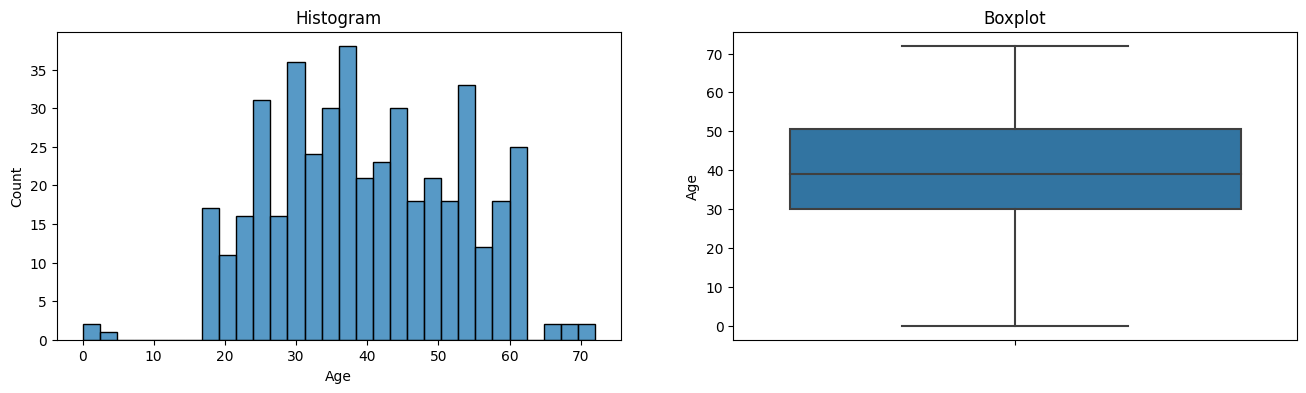

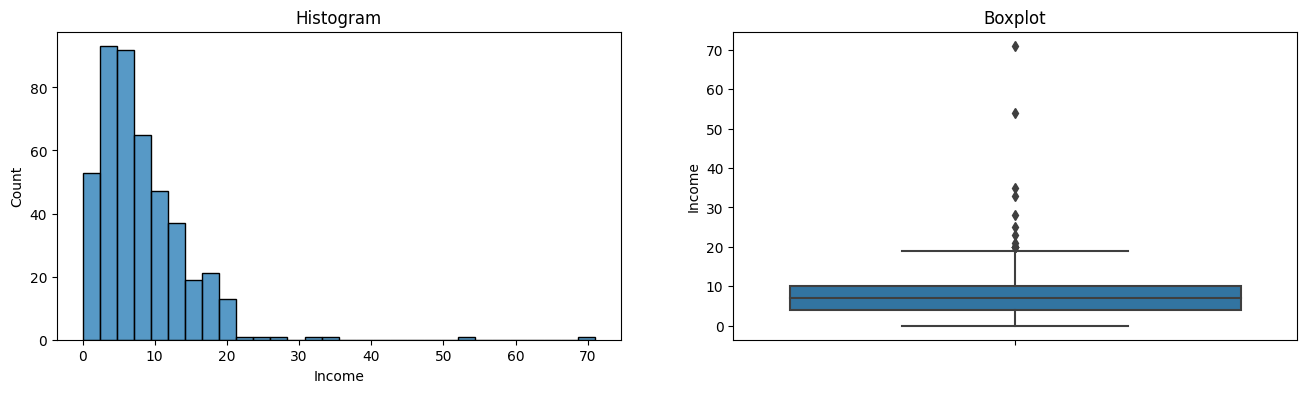

In [29]:
diagnostic_plots(df_cust, 'Age')
diagnostic_plots(df_cust, 'Income')

Walaupun pada boxplot dari variabel 'Age' terlihat tidak memiliki Outlier, tetapi pada histogram menunjukkan bahwa variabel 'Age' memiliki customer yang berumur 0, variabel tersebut akan di capping

In [30]:
print('Income mSkewness Value   : ', df_cust['Income'].skew())

Income mSkewness Value   :  3.302437095707957


In [31]:
Income_upper_limit, Income_lower_limit = find_skewed_boundaries(df_cust, 'Income', 2)
Income_upper_limit, Income_lower_limit

print('Income upper limit : ', Income_upper_limit)
print('Income lower limit : ', Income_lower_limit)

Income upper limit :  22.0
Income lower limit :  -8.0


In [32]:
print('Total Income: {}'.format(len(df_cust)))
print('Income more than 22 : {}'.format(len(df_cust[df_cust['Income'] > Income_upper_limit])))
print('')
print('% Income more than 22 : {}'.format(len(df_cust[df_cust['Income'] > Income_upper_limit])/len(df_cust) * 100))

Total Income: 447
Income more than 22 : 7

% Income more than 22 : 1.5659955257270695


In [33]:
windsoriser_1 = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='left', # cap left, right or both tails
                          fold=1.4,
                          variables=['Age'])
windsoriser_2 = Winsorizer(capping_method='iqr',
                          tail='right',
                          fold=2,
                          variables=['Income'])
windsoriser_1.fit(df_cust)
after_cap = windsoriser_1.transform(df_cust)
windsoriser_2.fit(after_cap)
df_cst = windsoriser_2.transform(after_cap)

In [34]:
print('Left Tail Caps  : ', windsoriser_1.left_tail_caps_)
print('right Tail Caps  : ', windsoriser_2.right_tail_caps_)

Left Tail Caps  :  {'Age': 1.3000000000000007}
right Tail Caps  :  {'Income': 22.0}


In [35]:
print('Customer Dataframe - Before Capping')
print(df_cust.describe())
print('')
print('Customer Dataframe - After Capping')
print(df_cst.describe())

Customer Dataframe - Before Capping
       CustomerID         Age      Gender      Income
count  447.000000  447.000000  447.000000  447.000000
mean   224.000000   39.782998    0.458613    8.109620
std    129.182042   12.848719    0.498842    6.569673
min      1.000000    0.000000    0.000000    0.000000
25%    112.500000   30.000000    0.000000    4.000000
50%    224.000000   39.000000    0.000000    7.000000
75%    335.500000   50.500000    1.000000   10.000000
max    447.000000   72.000000    1.000000   71.000000

Customer Dataframe - After Capping
       CustomerID         Age      Gender      Income
count  447.000000  447.000000  447.000000  447.000000
mean   224.000000   39.785906    0.458613    7.852349
std    129.182042   12.839838    0.498842    5.243885
min      1.000000    1.300000    0.000000    0.000000
25%    112.500000   30.000000    0.000000    4.000000
50%    224.000000   39.000000    0.000000    7.000000
75%    335.500000   50.500000    1.000000   10.000000
max    447

###Outlier Handling for Product

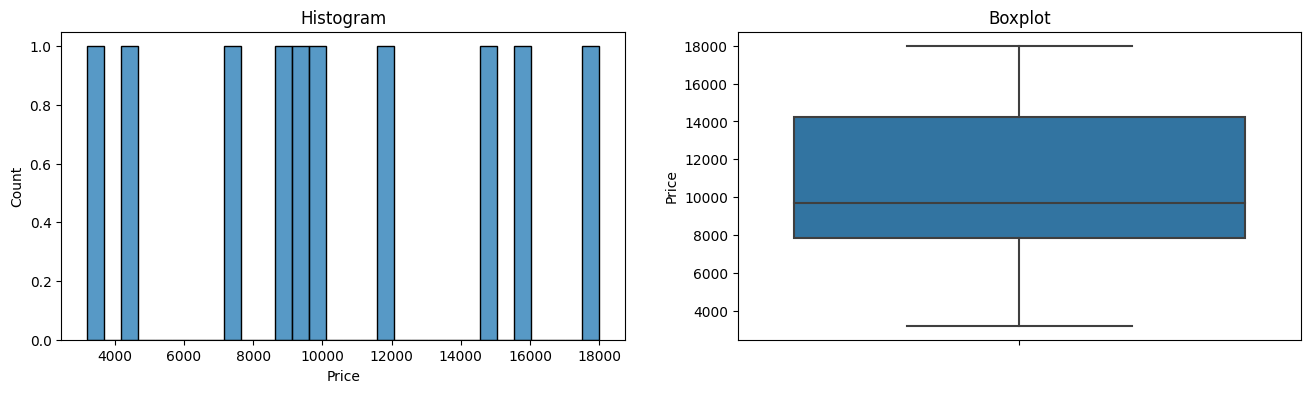

In [36]:
diagnostic_plots(df_prod, 'Price')

we can see in the boxplott from 'Price' didnt have an outliers

###Outlier Handling for Transaction

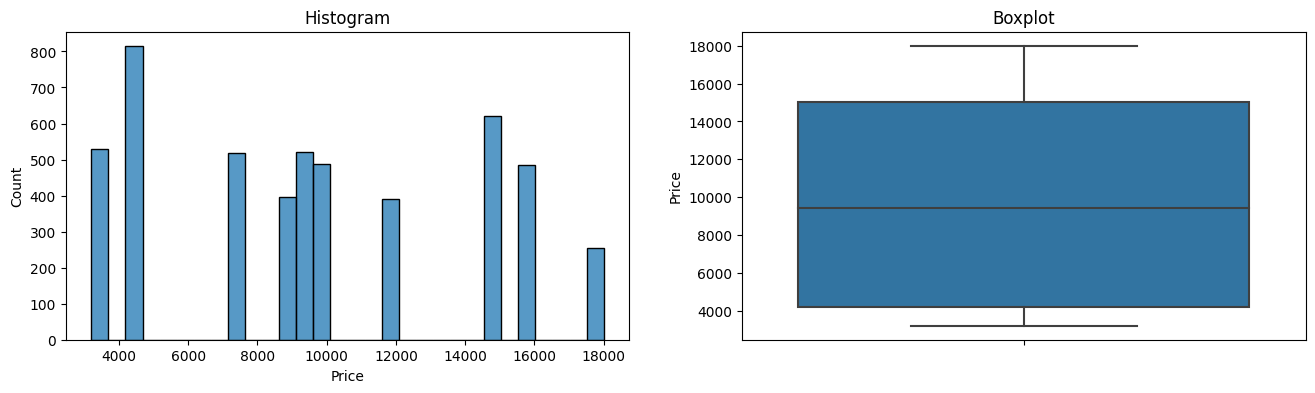

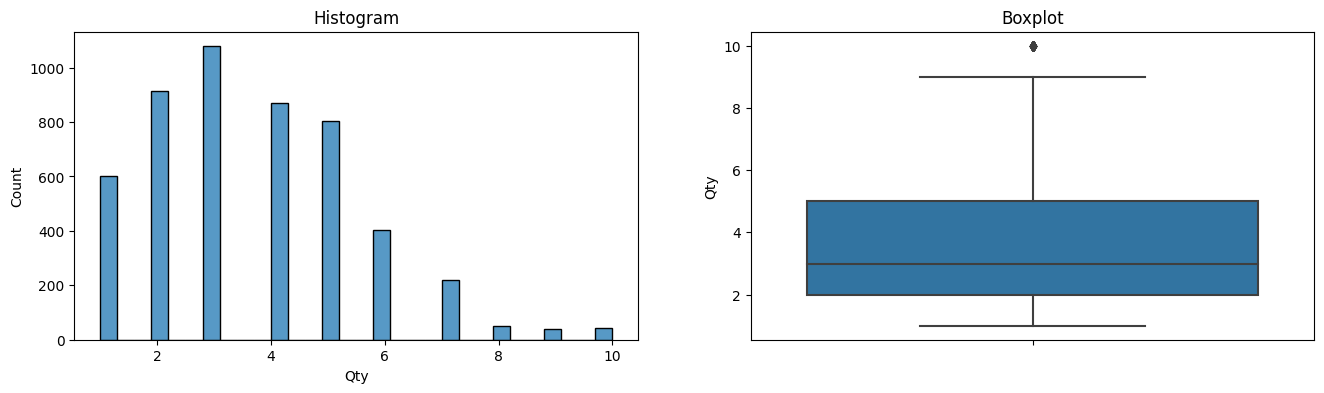

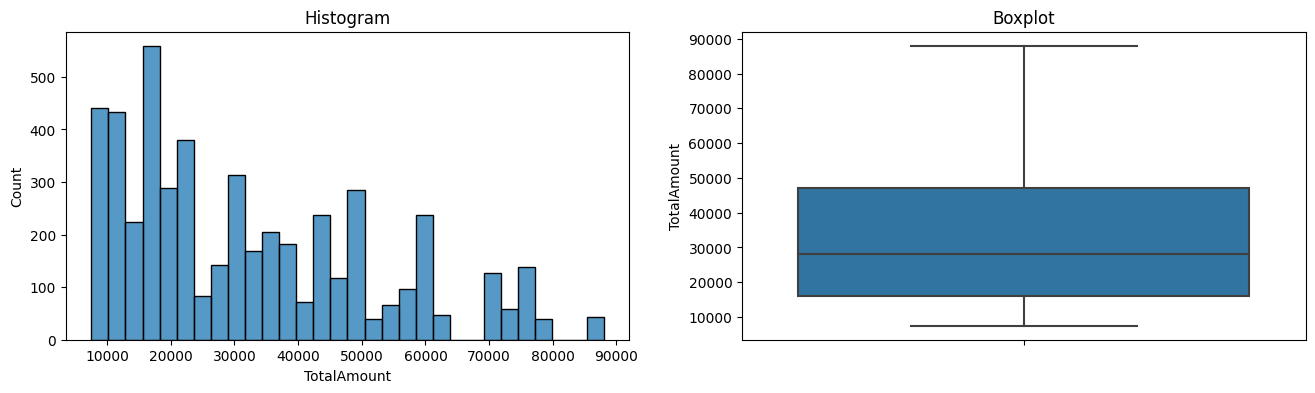

In [37]:
diagnostic_plots(df_trns, 'Price')
diagnostic_plots(df_trns, 'Qty')
diagnostic_plots(df_trns, 'TotalAmount')

In [38]:
print('Qty mSkewness Value   : ', df_trns['Qty'].skew())

Qty mSkewness Value   :  0.6751038497607537


In [39]:
Qty_upper_limit, Qty_lower_limit = find_skewed_boundaries(df_trns, 'Qty', 1.5)
Qty_upper_limit, Qty_lower_limit

print('Qty upper limit : ', Qty_upper_limit)
print('Qty lower limit : ', Qty_lower_limit)

Qty upper limit :  9.5
Qty lower limit :  -2.5


In [40]:
print('Total Income: {}'.format(len(df_trns)))
print('Qty more than 9.5 : {}'.format(len(df_trns[df_trns['Qty'] > Qty_upper_limit])))
print('')
print('% Qty more than 9.5 : {}'.format(len(df_trns[df_trns['Qty'] > Qty_upper_limit])/len(df_trns) * 100))

Total Income: 5020
Qty more than 9.5 : 44

% Qty more than 9.5 : 0.8764940239043826


In [41]:
windsoriser_3 = Winsorizer(capping_method='iqr',
                          tail='right',
                          fold=1.5,
                          variables=['Qty'])
windsoriser_3.fit(df_trns)
df_trn = windsoriser_3.transform(df_trns)

In [42]:
print('right Tail Caps  : ', windsoriser_3.right_tail_caps_)

right Tail Caps  :  {'Qty': 9.5}


In [43]:
print('Transaction Dataframe - Before Capping')
print(df_trns.describe())
print('')
print('Transaction Dataframe - After Capping')
print(df_trn.describe())

Transaction Dataframe - Before Capping
        CustomerID         Price          Qty   TotalAmount      StoreID
count  5020.000000   5020.000000  5020.000000   5020.000000  5020.000000
mean    221.263745   9684.800797     3.644622  32279.482072     7.489841
std     129.672955   4600.708780     1.855295  19675.462455     4.028502
min       1.000000   3200.000000     1.000000   7500.000000     1.000000
25%     108.000000   4200.000000     2.000000  16000.000000     4.000000
50%     221.000000   9400.000000     3.000000  28200.000000     7.000000
75%     332.000000  15000.000000     5.000000  47000.000000    11.000000
max     447.000000  18000.000000    10.000000  88000.000000    14.000000

Transaction Dataframe - After Capping
        CustomerID         Price          Qty   TotalAmount      StoreID
count  5020.000000   5020.000000  5020.000000   5020.000000  5020.000000
mean    221.263745   9684.800797     3.640239  32279.482072     7.489841
std     129.672955   4600.708780     1.840809 

#Merge Dataset

In [44]:
merge_1 = pd.merge(df_trn,df_cst, on="CustomerID")
merge_1

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,1/1/2022,P3,7500,4.0,30000,12,36.0,0,Married,10
1,TR67395,328,22/01/2022,P8,16000,3.0,48000,11,36.0,0,Married,10
2,TR89012,328,25/03/2022,P5,4200,5.0,21000,6,36.0,0,Married,10
3,TR97172,328,21/05/2022,P1,8800,5.0,44000,1,36.0,0,Married,10
4,TR57013,328,15/09/2022,P7,9400,6.0,56400,1,36.0,0,Married,10
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR27321,441,11/8/2022,P4,12000,2.0,24000,10,19.0,0,Single,2
5016,TR16832,441,25/08/2022,P6,18000,1.0,18000,6,19.0,0,Single,2
5017,TR81827,441,5/9/2022,P5,4200,3.0,12600,2,19.0,0,Single,2
5018,TR61352,441,28/09/2022,P5,4200,3.0,12600,1,19.0,0,Single,2


In [45]:
merge_2 = pd.merge(merge_1,df_str, on="StoreID")
merge_2

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,P3,7500,4.0,30000,12,36.0,0,Married,10,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
1,TR46326,165,22/02/2022,P9,10000,7.0,70000,12,44.0,1,Married,14,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
2,TR6391,165,3/5/2022,P2,3200,6.0,19200,12,44.0,1,Married,14,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
3,TR32490,183,26/03/2022,P10,15000,4.0,60000,12,27.0,1,Single,0,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
4,TR89318,183,17/07/2022,P3,7500,1.0,7500,12,27.0,1,Single,0,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR3902,408,11/11/2022,P10,15000,1.0,15000,2,34.0,1,Married,9,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238"
5016,TR5342,41,1/8/2022,P4,12000,3.0,36000,2,51.0,0,Married,16,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238"
5017,TR82062,192,7/7/2022,P3,7500,3.0,22500,2,26.0,0,Single,4,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238"
5018,TR88017,192,29/09/2022,P3,7500,4.0,30000,2,26.0,0,Single,4,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238"


In [46]:
merge_3 = pd.merge(merge_2,df_prod, on="ProductID")
merge_3

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,1/1/2022,P3,7500,4.0,30000,12,36.0,0,Married,10,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",Crackers,7500
1,TR89318,183,17/07/2022,P3,7500,1.0,7500,12,27.0,1,Single,0,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",Crackers,7500
2,TR9106,123,26/09/2022,P3,7500,4.0,30000,12,34.0,0,Married,4,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",Crackers,7500
3,TR4331,335,8/1/2022,P3,7500,3.0,22500,12,29.0,1,Single,4,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",Crackers,7500
4,TR6445,181,10/1/2022,P3,7500,4.0,30000,12,33.0,1,Married,9,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",Crackers,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR47252,190,14/07/2022,P6,18000,1.0,18000,2,34.0,1,Married,8,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238",Cashew,18000
5016,TR13595,268,3/9/2022,P6,18000,4.0,72000,2,49.0,1,Single,5,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238",Cashew,18000
5017,TR92165,365,8/3/2022,P6,18000,3.0,54000,2,28.0,0,Single,6,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238",Cashew,18000
5018,TR27651,15,7/7/2022,P6,18000,3.0,54000,2,30.0,0,Married,4,Prima Kelapa Dua,Prima,Modern Trade,"-6,914,864","107,608,238",Cashew,18000


##Regression Dataset

Membuat data baru untuk regression, yaitu groupby by
date lalu yang di aggregasi adalah qty di sum

In [47]:
reg_df = merge_3[['Date','Qty']].groupby(['Date']).\
    agg(Qty = ('Qty', 'sum')).reset_index()

reg_df

,Date,Qty
0,1/1/2022,49.0
1,1/10/2022,84.5
2,1/11/2022,66.0
3,1/12/2022,81.0
4,1/2/2022,50.0
...,...,...
360,9/5/2022,75.0
361,9/6/2022,54.5
362,9/7/2022,44.0
363,9/8/2022,72.5


##Clustering Dataset

Membuat data baru untuk clustering, yaitu groupby by
customerID lalu yang di aggregasi adalah :
- Transaction id count
- Qty sum
- Total amount sum


In [48]:
clus_df = merge_3[['CustomerID','TransactionID','Qty','TotalAmount']].groupby(['CustomerID']).\
    agg(countTransactionID = ('TransactionID','count'), sumQty = ('Qty', 'sum'), sumTotalAmount = ('TotalAmount', 'sum'))

clus_df

,countTransactionID,sumQty,sumTotalAmount
CustomerID,,,
1,17,60.0,623300
2,13,57.0,392300
3,15,56.0,446200
4,10,46.0,302500
5,7,27.0,268600
...,...,...,...
443,16,59.0,485100
444,18,62.0,577700
445,18,68.0,587200


#Modeling

##Regression ARIMA Model

ARIMA stands for AutoRegressive Integrated Moving Average. It's a widely used statistical method for time series forecasting and analysis. ARIMA models are capable of capturing a wide range of temporal patterns in data, making them useful for predicting future values based on historical patterns.

In [49]:
reg_df.head()

,Date,Qty
0,1/1/2022,49.0
1,1/10/2022,84.5
2,1/11/2022,66.0
3,1/12/2022,81.0
4,1/2/2022,50.0


In [50]:
reg_df.Date = pd.to_datetime(reg_df["Date"], errors="coerce")

<ipython-input-50-ff2f10b79255>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  reg_df.Date = pd.to_datetime(reg_df["Date"], errors="coerce")


In [51]:
df = reg_df.sort_values(by='Date')

In [52]:
df = df.set_index("Date").reset_index()
df.head()

,Date,Qty
0,2022-01-01,49.0
1,2022-01-02,50.0
2,2022-01-03,76.0
3,2022-01-04,97.5
4,2022-01-05,67.0


In [53]:
df.tail()

,Date,Qty
360,2022-12-27,70.0
361,2022-12-28,67.5
362,2022-12-29,42.0
363,2022-12-30,44.0
364,2022-12-31,37.0


(360, 2)


<Axes: >

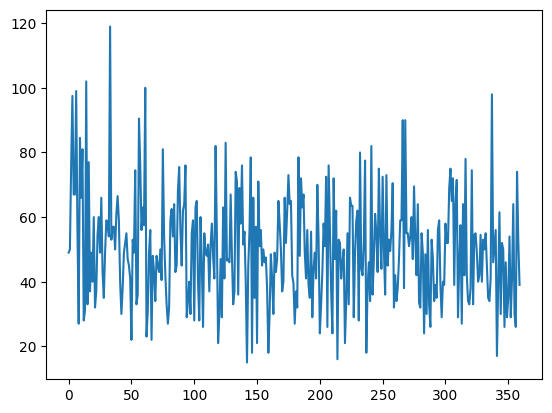

In [54]:
ab = df[df['Date']<'2022-12-27']
print(ab.shape)
ab['Qty'].plot.line()

In [55]:
ab = ab.set_index('Date').resample('D').ffill()
ab = ab.reset_index()

<Axes: >

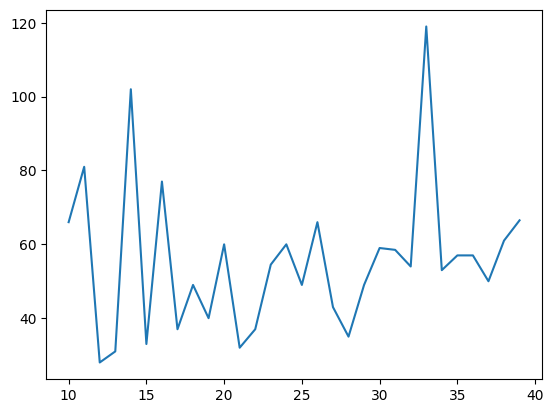

In [56]:
ab['Qty'].iloc[10:40].plot.line()

In [57]:
rides = ab[['Qty']]

<Axes: >

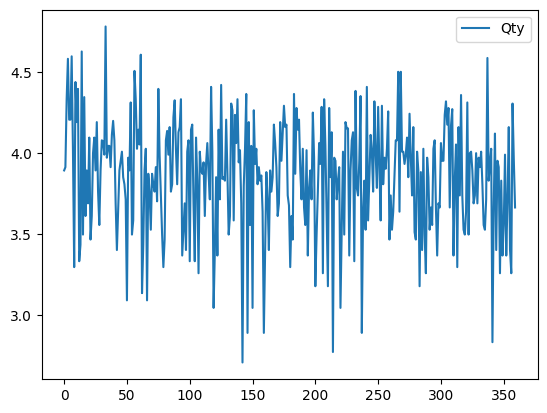

In [58]:
log_ridership = np.log(rides)
log_ridership.plot.line()

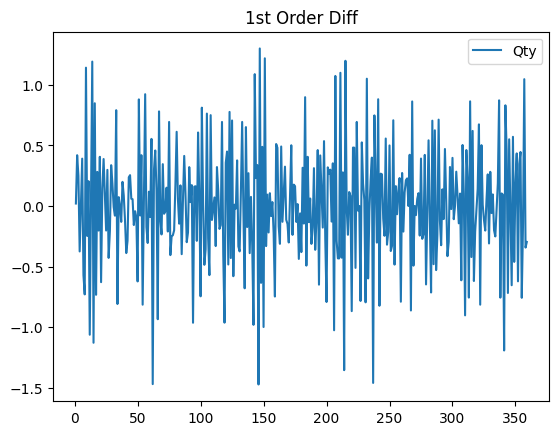

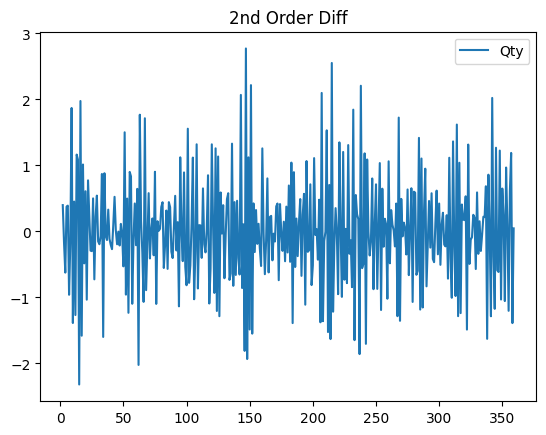

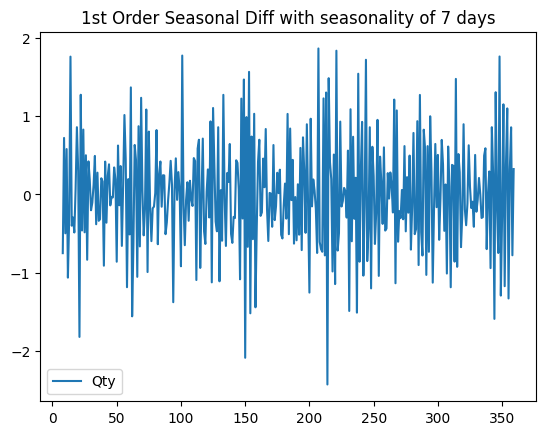

In [59]:
# 1st order differencing
rider_single_diff = (log_ridership.diff()).dropna()  # 1st term will be NAN

#NOTE: diff(diff(X)) is 2nd order differencing
rider_double_diff = (rider_single_diff.diff()).dropna()

#seasonal differencing of order 1
rider_single_seasonal_diff = (rider_single_diff.diff(periods=7)).dropna()  # 1st term will be NAN
rider_double_seasonal_diff = (rider_double_diff.diff(periods=7)).dropna()  # 1st term will be NAN

rider_single_diff.plot.line()
plt.title('1st Order Diff')
plt.show()

rider_double_diff.plot.line()
plt.title('2nd Order Diff')
plt.show()

rider_single_seasonal_diff.plot.line()
plt.title('1st Order Seasonal Diff with seasonality of 7 days')
plt.show()

In [60]:
#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(rider_double_diff, autolag='AIC') #Note: the input should not be a dataframe but a panda series
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -9.438491e+00
p-value                        4.967673e-16
#Lags Used                     1.600000e+01
Number of Observations Used    3.410000e+02
Critical Value (1%)           -3.449673e+00
Critical Value (5%)           -2.870053e+00
Critical Value (10%)          -2.571306e+00
dtype: float64


- Test Statistic: This is the Dickey-Fuller test statistic itself. It's a negative number (which is common), and it's used in comparison with critical values to determine the stationarity of the series. The more negative the test statistic, the stronger the evidence against the null hypothesis (the series is non-stationary).

- p-value: This is the probability associated with the test statistic. In this case, the p-value is very close to zero (4.967673e-16), which is significantly lower than common significance levels (like 0.05). This indicates strong evidence against the null hypothesis and suggests that the series is likely stationary.

- #Lags Used: This indicates the number of lags used in the regression when applying the test. In your case, 16 lags were used.

- Number of Observations Used: This tells you the number of data points used in the test. In your case, 341 observations were used.

- Critical Values: These are the values that the test statistic should be compared against to make a decision about the stationarity of the series. The critical values depend on the chosen significance level (1%, 5%, and 10%). If the test statistic is more negative than these critical values, you can reject the null hypothesis of non-stationarity.

the very low p-value combined with the test statistic being more negative than the critical values strongly suggests that you can reject the null hypothesis of non-stationarity. This implies that your time series is likely stationary, which is often a prerequisite for certain time series analysis and forecasting methods like ARIMA.

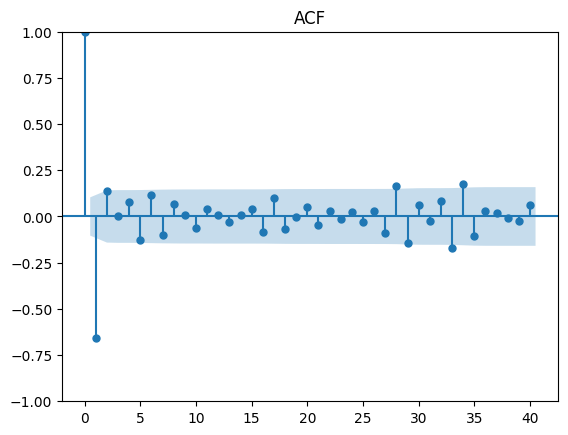

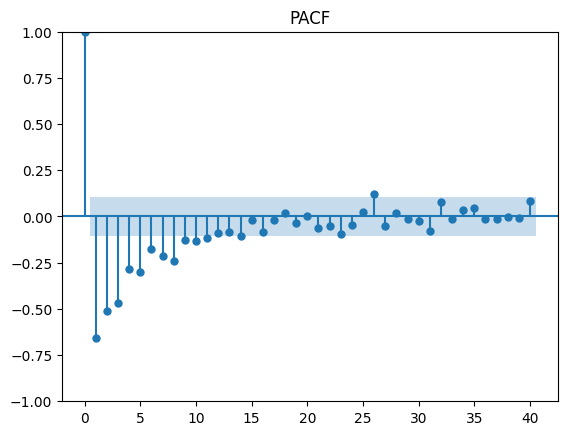

In [61]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(rider_double_diff.values.squeeze(), lags=40)
plt.title('ACF')
plt.show()

sm.graphics.tsa.plot_pacf(rider_double_diff.values.squeeze(), lags=40)
plt.title('PACF')
plt.show()

In [62]:
#for our model we need dates as indexes
ab = ab.set_index('Date')

#doing log transformation on main data
ab['Qty'] = np.log(ab[['Qty']])

AutoARIMA, short for "Automatic AutoRegressive Integrated Moving Average," is an extension of the ARIMA model that automates the process of selecting the optimal hyperparameters for an ARIMA model. ARIMA models require specifying the values for the orders 'p', 'd', and 'q' (the AutoRegressive, Integrated, and Moving Average components) which can be challenging, especially for those who are new to time series analysis. AutoARIMA simplifies this process by automatically finding the best values for these parameters

In [63]:
stepwise_model = auto_arima(ab['Qty'], start_p=1, start_q=1,
                           max_p=2, max_q=1, m=7,
                           start_P=1,max_P=2, seasonal=True,
                           d=1, D=1, max_d = 2, max_D=2,trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=302.833, Time=2.32 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=775.003, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=548.997, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.06 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=1.56 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=inf, Time=2.67 sec
 ARIMA(1,1,1)(2,1,1)[7]             : AIC=303.284, Time=7.01 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=303.265, Time=6.54 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=inf, Time=1.48 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=302.571, Time=5.81 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=300.657, Time=3.60 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=301.269, Time=4.62 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=300.914, Time=2.61 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=inf, Time=2.57 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=437.107, Time=2.42 sec
 A

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:                                    Qty   No. Observations:                  360
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood                -146.328
Date:                                Thu, 31 Aug 2023   AIC                            300.657
Time:                                        00:11:03   BIC                            316.111
Sample:                                    01-01-2022   HQIC                           306.807
                                         - 12-26-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9873      0.018    -55.943      0.000      -1.022      -0.953
ma.

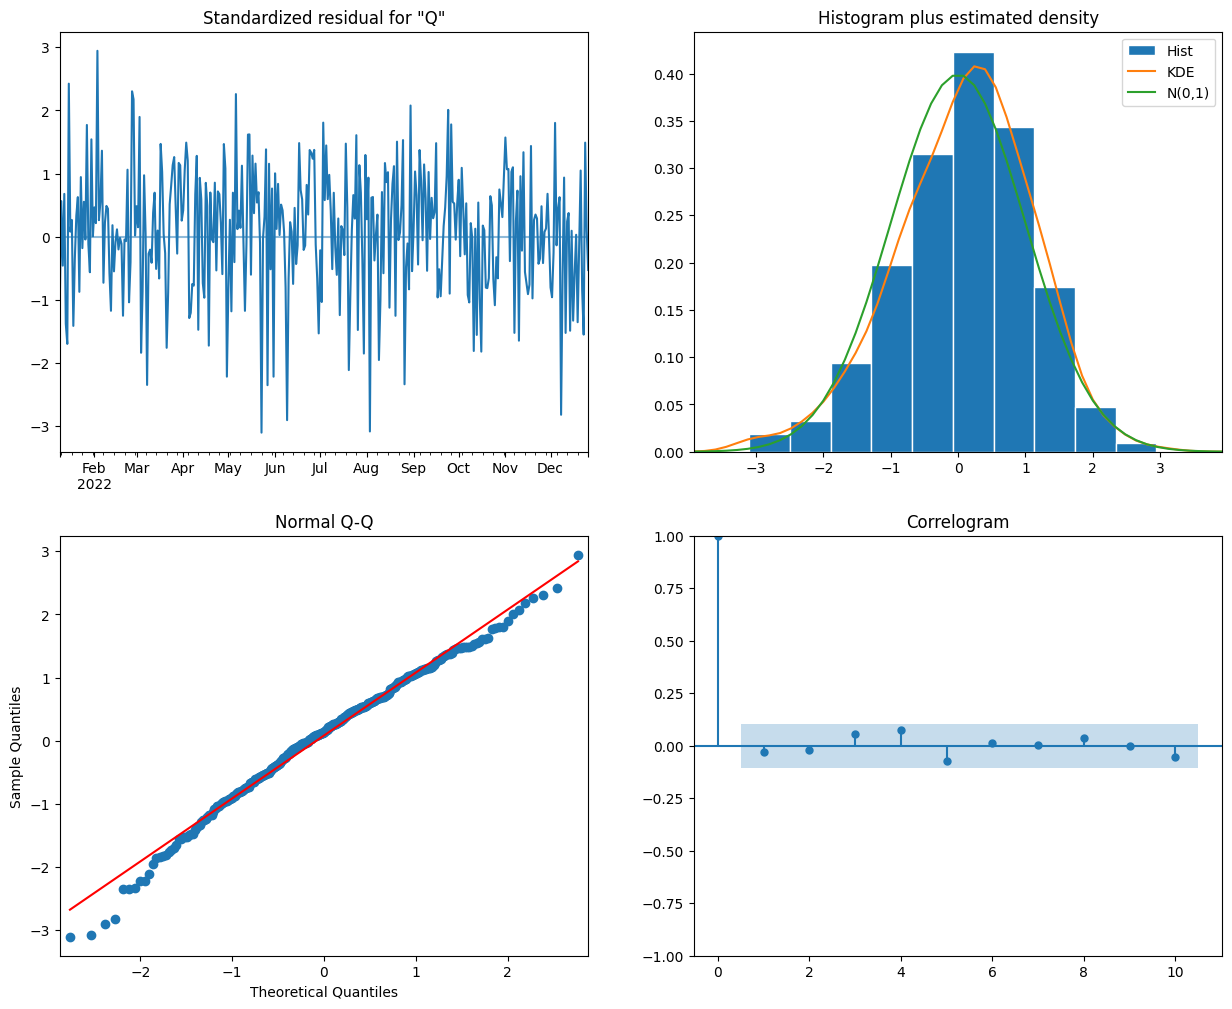

In [64]:
# Applying Seasonal ARIMA model to forcast the data
mod = sm.tsa.SARIMAX(ab['Qty'], trend='n', order=(0,1,1), seasonal_order=(0,1,2,7))  #also play with "trend" argument
results = mod.fit()
print(results.summary())

results.plot_diagnostics(figsize=(15,12))
plt.show()

In [65]:
ab['Qty'].shape

(360,)

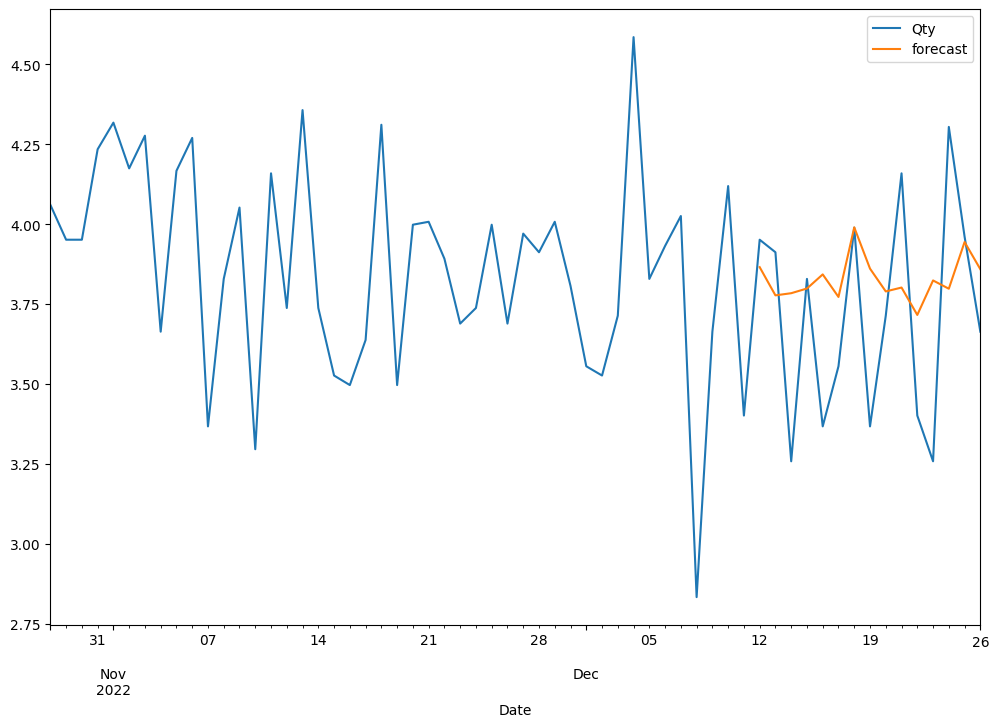

In [66]:
ab['forecast'] = results.predict(start = 345, end= 359, dynamic= True)
ab[['Qty', 'forecast']].iloc[-60:].plot(figsize=(12, 8))
plt.show()

###Evaluation

In [67]:
def calculate_rmse(actual, forecasted):
    rmse = np.sqrt(np.mean((actual - forecasted)**2))
    return rmse

def calculate_mae(actual, forecasted):
    mae = np.mean(np.abs(actual - forecasted))
    return mae

def calculate_mape(actual, forecasted):
    mape = np.mean(np.abs((actual - forecasted) / actual)) * 100
    return mape

In [68]:
# Calculate RMSE
rmse = calculate_rmse(ab['Qty'].iloc[-60:], ab['forecast'].iloc[-60:])

# Calculate MAE
mae = calculate_mae(ab['Qty'].iloc[-60:], ab['forecast'].iloc[-60:])

# Calculate MAPE
mape = calculate_mape(ab['Qty'].iloc[-60:], ab['forecast'].iloc[-60:])

# Print evaluation metrics
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 0.33332502075173814
MAE: 0.2663262855226242
MAPE: 7.480020410500554


- Root Mean Squared Error (RMSE):
RMSE measures the average magnitude of the errors between predicted values and actual values.
1. It gives higher weight to larger errors, making it sensitive to outliers.
2. Lower RMSE values indicate better model accuracy.
RMSE of approximately 0.33 means, on average, the difference between predicted and actual values is around 0.33 units. Smaller values suggest better accuracy.

- Mean Absolute Error (MAE):
MAE is the average of the absolute differences between predicted and actual values.
1. It treats all errors equally, regardless of their magnitude.
2. Like RMSE, lower MAE values indicate better model accuracy.
MAE of about 0.27 indicates that, on average, the model's predictions differ from the actual values by about 0.27 units.

- Mean Absolute Percentage Error (MAPE):
MAPE measures the average percentage difference between predicted and actual values, relative to the actual values.
1. It's expressed as a percentage, making it easy to understand in terms of prediction accuracy.
2. Lower MAPE values indicate better accuracy.
A MAPE of approximately 7.48% means that, on average, the model's predictions are off by about 7.48% relative to the actual values.

these metrics collectively assess how well the forecasting model is performing. Lower values of RMSE, MAE, and MAPE generally indicate a more accurate model. It's common to use a combination of these metrics to get a comprehensive understanding of a model's strengths and weaknesses in making predictions.

###Forcast

In [69]:
def forcasting_future_months(df, no_of_periods):
    df_predict = df.reset_index()
    mon = df_predict['Date']
    mon = mon + pd.DateOffset(days = no_of_periods)
    future_dates = mon[-no_of_periods -1:]
    df_predict = df_predict.set_index('Date')
    future = pd.DataFrame(index=future_dates, columns= df_predict.columns)
    df_predict = pd.concat([df_predict, future])
    df_predict['forecast'] = results.predict(start = 359, end = 390, dynamic= True)
    df_predict[['Qty', 'forecast']].iloc[-60:].plot(figsize=(12, 8))
    plt.show()
    return df_predict[-no_of_periods:]

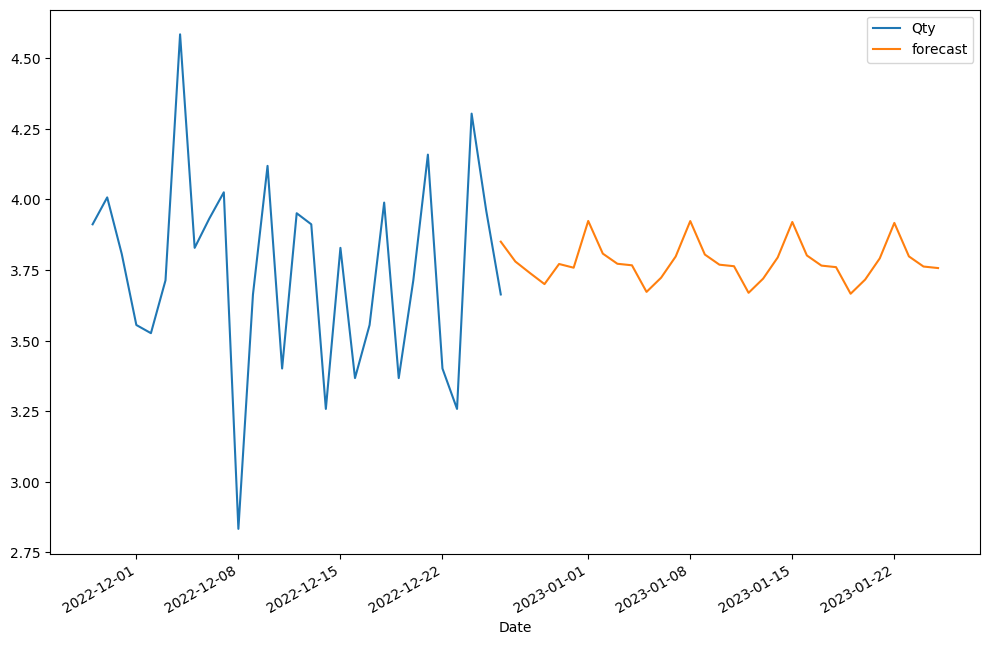

In [70]:
predicted = forcasting_future_months(ab,30)  #insert dataframe name and number of period for which to forecast

<ipython-input-71-b670a17e468c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = ab.append(forecast)


<Axes: xlabel='Date'>

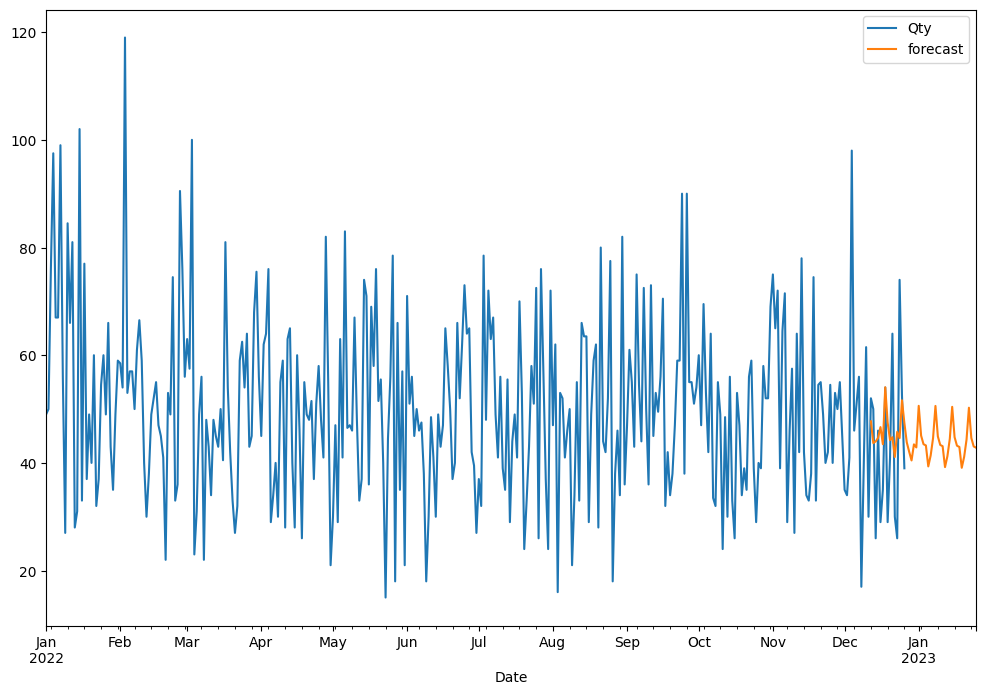

In [71]:
ab = ab.apply(np.exp)
forecast = predicted.apply(np.exp)
final = ab.append(forecast)
final[['Qty', 'forecast']].plot(figsize=(12, 8))

##Cluster Model

In [72]:
inertia = []
for k in range(1, 9):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(clus_df)
    inertia.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [73]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 9)])
inertia_df

,Inertia
1,6.928032e+12
2,2.434755e+12
3,1.233001e+12
4,7.765120e+11
5,5.040814e+11
6,3.813048e+11
7,2.796992e+11
8,2.126520e+11


In the inertia elbow method, we seek the "elbow point" in the graph of inertia values against the number of clusters. This point indicates the number of clusters where the decrease in inertia value becomes less significant or slows down. This point can be considered as the optimal number of clusters or the number of clusters that best suit our data modeling.

Text(0.5, 1.0, 'Elbow Method')

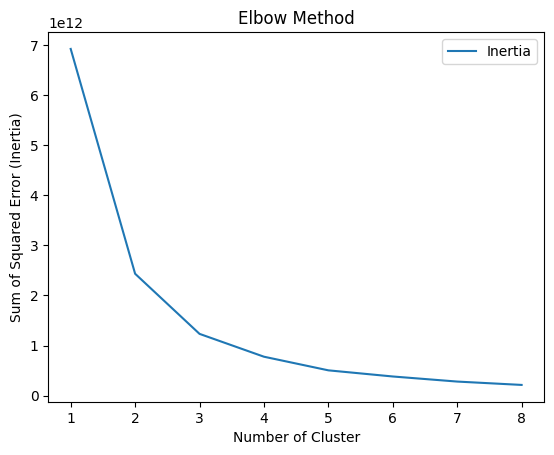

In [74]:
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

In [75]:
x = clus_df.values

In [76]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
cluster = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


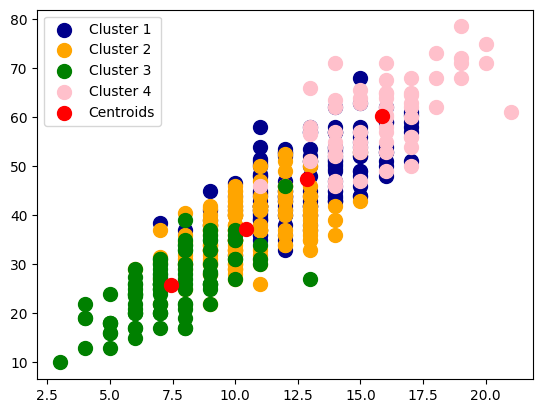

In [77]:
plt.scatter(x[cluster == 0, 0], x[cluster == 0, 1], s = 100, c = 'darkblue', label = 'Cluster 1')
plt.scatter(x[cluster == 1, 0], x[cluster == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[cluster == 2, 0], x[cluster == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[cluster == 3, 0], x[cluster == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()